In [1]:
# Load dataset

import pandas as pd

data_xls = pd.read_excel('Training data.xlsx', 'Info', index_col=None)
data_xls.to_csv('Info.csv', encoding='utf-8',index = False)
data_xls = pd.read_excel('Training data.xlsx', 'TPR', index_col=None)
data_xls.to_csv('TPR.csv', encoding='utf-8', index = False)

infoSet = pd.read_csv("Info.csv", header = None, skiprows=[0])
TPRSet = pd.read_csv("TPR.csv", header = None, skiprows=[0])

In [2]:
# Merge info set and TPR set
from sklearn.decomposition import PCA

aggregation_functions = {2: 'mean', 3: 'mean', 4: 'mean', 5: 'mean', 6: 'mean'}

TPRaggreg = TPRSet.groupby(TPRSet[0]).aggregate(aggregation_functions)
mergeSet = pd.merge(infoSet.iloc[:, [True, True, True, False, False, False, False]], TPRaggreg.iloc[:, [True, True, True, True, True]], on=0)
TPRaggreg

,2,3,4,5,6
0,,,,,
12584,37.818421,87.764706,21.294118,113.055556,67.823529
82244,37.000000,84.684211,19.750000,131.789474,70.684211
90395,37.012500,66.777778,18.312500,141.444444,65.166667
113952,37.036364,75.866667,17.533333,130.882353,86.529412
146267,37.219048,82.352941,16.705882,111.250000,70.125000
...,...,...,...,...,...
89837721,37.419231,99.687500,19.562500,126.000000,75.000000
90073821,37.597143,90.576923,17.888889,142.842105,72.368421
95012241,37.847727,91.411765,19.266667,138.687500,74.500000


In [3]:
# Extract feature list and clean strings
import numpy as np

def str_trim(series):
    series = series.replace(' ', np.nan)
    series = series.replace('', np.nan, regex=True)
    series = series.replace("0", np.nan, regex=True)
    
    feature = pd.DataFrame(series.str.split(',').explode())
    feature = feature.drop_duplicates(subset=None, keep='first', inplace=False)
    feature = feature.replace('', np.nan)
    feature = feature.dropna()

    return series, feature

bacteria = infoSet.iloc[:, 5]
bacteria = bacteria.rename("bacteria")
bacteriaSet, bacteria_feature= str_trim(bacteria)
bacteria_feature = bacteria_feature.to_numpy().flatten()

common = infoSet.iloc[:, 3]
common = common.rename("common")
commonSet, commonFeature = str_trim(common)
commonFeature = commonFeature.to_numpy().flatten()

antibiotics = infoSet.iloc[:, 4]
antibiotics = antibiotics.rename("antibiotics")
antibioticsSet, antibiotics_feature= str_trim(antibiotics)
antibiotics_feature = antibiotics_feature.to_numpy().flatten()

In [4]:
# Create one hot encoding
def extract_df(ser, features):
    df= pd.DataFrame()
    for feature in features:
        id = 0
        new_list = []
        for element in ser:
            if feature == element:
                new_list.append(1)
            else:
                new_list.append(0)
    
        df[feature] = new_list
    return df
            
bacteria_df = extract_df(bacteriaSet, bacteria_feature)
common_df = extract_df(commonSet, commonFeature)
antibiotics_df = extract_df(antibioticsSet, antibiotics_feature)
# common_df
# antibiotics_df
# bacteria_df

In [5]:
# Create cleaned data set
import numpy as np
from sklearn import preprocessing


# 創造 dummy variables
label_encoder = preprocessing.LabelEncoder()
encoded_no = label_encoder.fit_transform(mergeSet[0])

# 建立訓練與測試資料
patient_x = pd.concat([mergeSet, bacteria_df, common_df, antibiotics_df], axis=1)
patient_x = patient_x.iloc[:, 1:]
patient_y = infoSet.iloc[:, 6]
patient_y = np.array(patient_y)
patient_x

,1,2_x,2_y,3,4,5,6,Escherichia coli,Yeast-like,Staphylococcus aureus (MRSA),...,Hydroxychloroquine,Flomoxef,SMZ/TMP,\tErtapenem Sod,Amphotericin B deoxycholate,Unifradine,cefazolin,Norfloxacin,Erythromycin Estolate,Valganciclovir
0,1,44,37.818421,87.764706,21.294118,113.055556,67.823529,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,75,37.000000,84.684211,19.750000,131.789474,70.684211,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,92,37.012500,66.777778,18.312500,141.444444,65.166667,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,42,37.036364,75.866667,17.533333,130.882353,86.529412,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,41,37.219048,82.352941,16.705882,111.250000,70.125000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,2,75,37.419231,99.687500,19.562500,126.000000,75.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
316,2,40,37.597143,90.576923,17.888889,142.842105,72.368421,0,0,0,...,0,0,0,0,0,0,0,0,0,0
317,2,64,37.847727,91.411765,19.266667,138.687500,74.500000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
318,1,57,37.657143,103.185185,18.000000,172.444444,107.851852,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# My Logistic regression
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z, dtype=np.float128))

def average_gradient(model, train_x, train_y):
    gradient = np.zeros(len(model))
    for index in range(len(train_x)):
        gradient += np.multiply((sigmoid(model.T.dot(train_x[index])) - train_y[index]), train_x[index])
    return gradient / len(gradient)

def logistic_train(train_x, train_y):
    model = np.zeros(len(train_x[0]))
    
    learning_rate = 1
    limit = 1000
    for i in range(limit):
        model = model - learning_rate * average_gradient(model, train_x, train_y)
        learning_rate *= 0.97 
    return model

def logistic_predict(model, data):
    result = []
    for x in data:
        if sigmoid(model.dot(x)) > 0.5:
            result.append(1)
        else:
            result.append(0)
    return result

def logistic_predict_prob(model, data):
    result = []
    for x in data:
        result.append(sigmoid(model.dot(x)))
    return result

def visulization(model):
    plt.rcdefaults()    #  Reset default RC parameter
    fig,ax =plt.subplots()    #   ax is sub-picture

    features_label = ['Gender', 'Age', 'Temperature', 'Pulse', 'Rate', 'NBPS', 'NBPD', 'Comorbidities1']
    
    y_pos = np.arange(len(model))

    ax.barh(y_pos, model, align='center',color='green',ecolor='black')

    ax.set_yticks(y_pos)   # y axis scale
    ax.set_yticklabels(features_label) #  y axis label
    ax.invert_yaxis()  #  Reverse y axis
    ax.set_xlabel('Feature Weight')   # X axis label

    plt.show()  

In [7]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import VarianceThreshold
from sklearn import metrics

skf = StratifiedKFold(n_splits=5)
skf.get_n_splits(patient_x, patient_y)


thresholds = np.linspace(0.1,1,10)

k_scores = [0]
best_threshold = 0
for threshold in thresholds:
    selector = VarianceThreshold(threshold=(threshold))
    selected_patient_x = selector.fit_transform(patient_x)
    f1s = []
    for train_index, test_index in skf.split(selected_patient_x, patient_y):
        model = logistic_train(selected_patient_x[train_index], patient_y[train_index])
        test_y_predicted = logistic_predict(model, selected_patient_x[test_index])
        f1s.append(metrics.f1_score(patient_y[test_index], test_y_predicted))
    if np.average(f1s) > np.max(k_scores):
        best_threshold = threshold
    k_scores.append(np.average(f1s))

print("Average f1 value for each threshold, from 0.1, 0.2 ... 1.0")
print(k_scores)
print("Best threshold: %f" % best_threshold)
# print(best_threshold)

<ipython-input-6-be4a3b52639f>:5: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z, dtype=np.float128))
<ipython-input-6-be4a3b52639f>:5: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z, dtype=np.float128))
<ipython-input-6-be4a3b52639f>:5: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z, dtype=np.float128))
<ipython-input-6-be4a3b52639f>:5: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z, dtype=np.float128))
<ipython-input-6-be4a3b52639f>:5: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z, dtype=np.float128))
<ipython-input-6-be4a3b52639f>:5: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z, dtype=np.float128))
<ipython-input-6-be4a3b52639f>:5: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z, dtype=np.float128))
<ipython-input-6-be4a3b52639f>:5: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z, dtyp

Average f1 value for each threshold, from 0.1, 0.2 ... 1.0
[0, 0.4468159718159718, 0.4468159718159718, 0.43536250153897216, 0.43536250153897216, 0.43536250153897216, 0.43536250153897216, 0.43536250153897216, 0.43536250153897216, 0.43536250153897216, 0.43536250153897216]
Best threshold: 0.100000


In [8]:
# Generate the final model
from sklearn import model_selection

selector = VarianceThreshold(threshold=(best_threshold))
patient_x = selector.fit_transform(patient_x)

train_x, test_x, train_y, test_y = model_selection.train_test_split(patient_x, patient_y, test_size = 0.1)

model = logistic_train(train_x, train_y)
test_y_predicted = logistic_predict(model, test_x)

accuracy = metrics.accuracy_score(test_y, test_y_predicted)
print(accuracy)
f1 = metrics.f1_score(test_y, test_y_predicted)
print(f1)

<ipython-input-6-be4a3b52639f>:5: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z, dtype=np.float128))


0.8125
0.625


In [9]:
patient_x

array([[  1.        ,  44.        ,  37.81842105, ..., 113.05555556,
         67.82352941,   1.        ],
       [  2.        ,  75.        ,  37.        , ..., 131.78947368,
         70.68421053,   1.        ],
       [  2.        ,  92.        ,  37.0125    , ..., 141.44444444,
         65.16666667,   0.        ],
       ...,
       [  2.        ,  64.        ,  37.84772727, ..., 138.6875    ,
         74.5       ,   0.        ],
       [  1.        ,  57.        ,  37.65714286, ..., 172.44444444,
        107.85185185,   0.        ],
       [  2.        ,  82.        ,  37.35714286, ..., 125.52631579,
         76.52631579,   0.        ]])

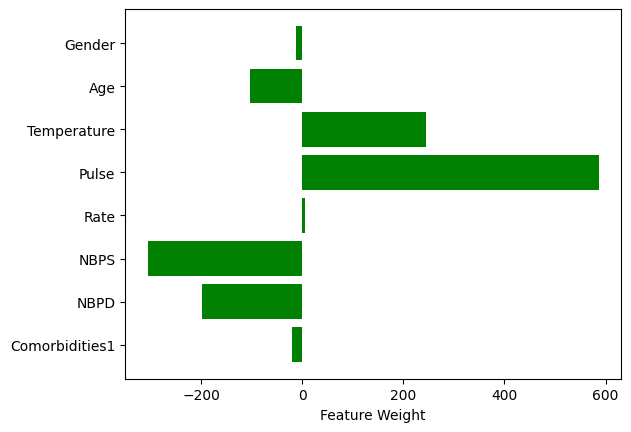

In [10]:
visulization(model)

In [11]:
# Testing
data_xls = pd.read_excel('Testing data.xlsx', 'Info', index_col=None)
data_xls.to_csv('TestingInfo.csv', encoding='utf-8',index = False)
data_xls = pd.read_excel('Testing data.xlsx', 'TPR', index_col=None)
data_xls.to_csv('TestingTPR.csv', encoding='utf-8', index = False)

infoSet = pd.read_csv("TestingInfo.csv", header = None, skiprows=[0])
TPRSet = pd.read_csv("TestingTPR.csv", header = None, skiprows=[0])

aggregation_functions = {2: 'mean', 3: 'mean', 4: 'mean', 5: 'mean', 6: 'mean'}

TPRaggreg = TPRSet.groupby(TPRSet[0]).aggregate(aggregation_functions)
mergeSet = pd.merge(infoSet.iloc[:, [True, True, True, False, False, False]], TPRaggreg.iloc[:, [True, True, True, True, True]], on=0)

# Extract feature
bacteria = infoSet.iloc[:, 5]
bacteria = bacteria.rename("bacteria")
bacteriaSet, bacteria_feature_not_used = str_trim(bacteria)
# bacteria_feature_not_used = bacteria_feature_not_used.to_numpy().flatten()

common = infoSet.iloc[:, 3]
common = common.rename("common")
commonSet, common_feature_not_used = str_trim(common)
# commonFeature = commonFeature.to_numpy().flatten()

antibiotics = infoSet.iloc[:, 4]
antibiotics = antibiotics.rename("antibiotics")
antibioticsSet, antibiotics_feature_not_used = str_trim(antibiotics)

# One Hot encoding
bacteria_df = extract_df(bacteriaSet, bacteria_feature)
common_df = extract_df(commonSet, commonFeature)
antibiotics_df = extract_df(antibioticsSet, antibiotics_feature)


# Concate
test_x = pd.concat([mergeSet, bacteria_df, common_df, antibiotics_df], axis=1)
test_x = test_x.iloc[:, 1:]

# Feature selection VarianceThreshold
test_x = test_x.iloc[:,selector.get_support()]
test_x = np.array(test_x)

# Predict
test_y_predicted = logistic_predict(model, test_x)
# model
test_y_predicted

<ipython-input-6-be4a3b52639f>:5: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z, dtype=np.float128))


[0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1]